<a href="https://colab.research.google.com/github/Floccinaucinibilipilification/Data-Lit/blob/master/Analyzing_Distributions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Lit : Analyzing Distributions

## I. Going through the [“Histograms and Density Plots in Python” tutorial](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,8)

In [0]:
import warnings
warnings.filterwarnings("ignore")

### First, have a look at the dataset

#### How many flights are there?

In [76]:
flights = pd.read_csv('formatted_flights.csv',index_col=0)
flights.head(10)

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.
5,12.0,United Air Lines Inc.
6,19.0,JetBlue Airways
7,-14.0,ExpressJet Airlines Inc.
8,-8.0,JetBlue Airways
9,8.0,American Airlines Inc.


In [77]:
flights.describe(include='all')

,arr_delay,name
count,317113.000000,317113
unique,NaN,16
top,NaN,United Air Lines Inc.
freq,NaN,56359
mean,1.297143,NaN
std,29.064401,NaN
min,-60.000000,NaN
25%,-17.000000,NaN
50%,-6.000000,NaN
75%,11.000000,NaN


According to the info above:
 - The **average** delay time of all the filghts is only **~80 seconds** (very suprising), but with a standard deviation of ~30min;
 - The **longest** delay time is **2 hours**;
 - The **shortest** delay time is **-1 hour**, which is **1h early** (interesting).

#### What are the airlines in the dataset?

In [78]:
airlines = pd.read_csv('airlines.csv')
print(airlines)

   carrier                         name
0       9E            Endeavor Air Inc.
1       AA       American Airlines Inc.
2       AS         Alaska Airlines Inc.
3       B6              JetBlue Airways
4       DL         Delta Air Lines Inc.
5       EV     ExpressJet Airlines Inc.
6       F9       Frontier Airlines Inc.
7       FL  AirTran Airways Corporation
8       HA       Hawaiian Airlines Inc.
9       MQ                    Envoy Air
10      OO        SkyWest Airlines Inc.
11      UA        United Air Lines Inc.
12      US              US Airways Inc.
13      VX               Virgin America
14      WN       Southwest Airlines Co.
15      YV           Mesa Airlines Inc.


### Histograms of Arrival Delay

#### Choose bins

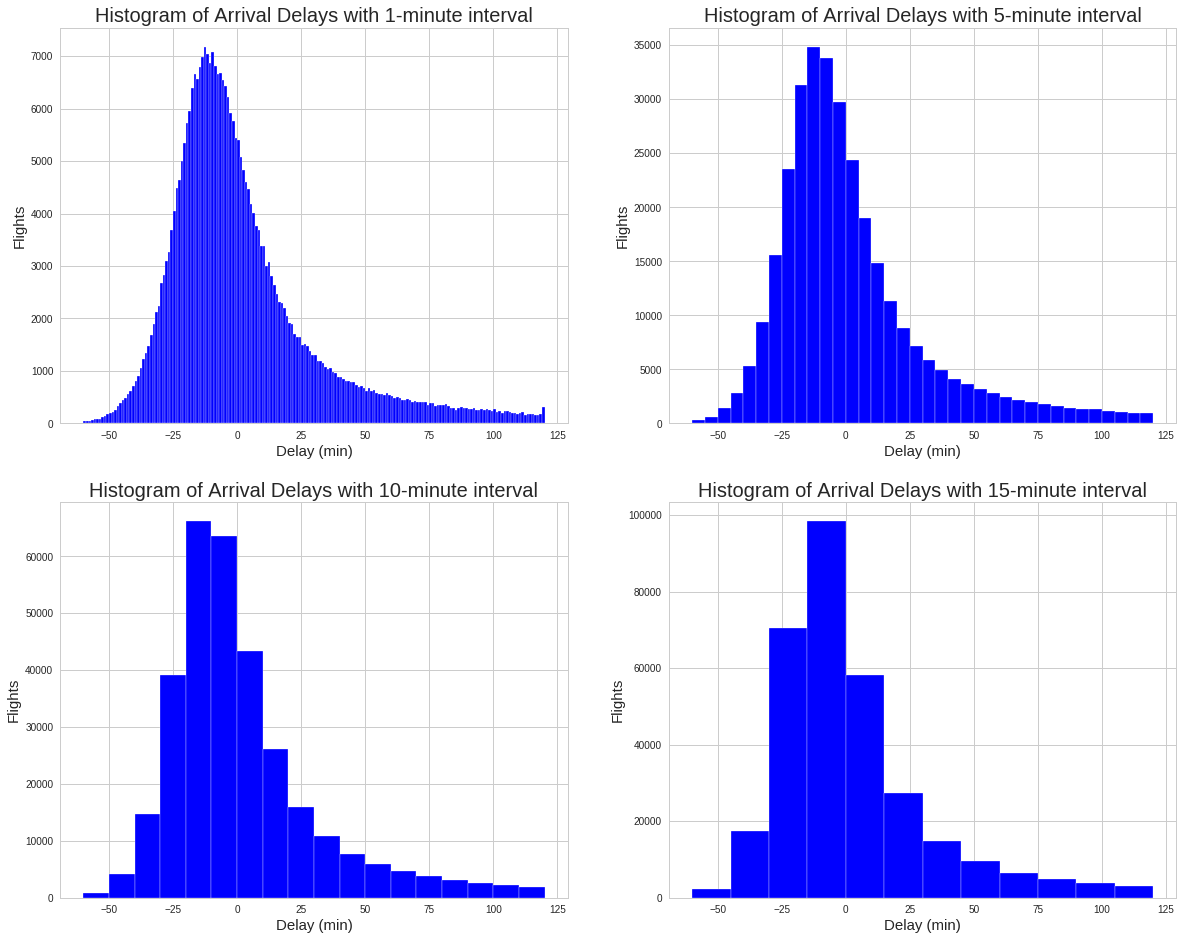

In [79]:
plt.figure(figsize=(20,16))
for i, bin in enumerate([1,5,10,15]):
  ax = plt.subplot(2,2,i+1)
  ax.hist(flights.arr_delay,bins=int(180/bin),color='blue',edgecolor='white')
  plt.title(f'Histogram of Arrival Delays with {bin}-minute interval', size=20)
  plt.xlabel('Delay (min)', size=15)
  plt.ylabel('Flights', size=15)

Histogram w/ 5-minute interval seems most appropriate.

#### Plot w/ Matplotlib

Text(0, 0.5, 'Flights')

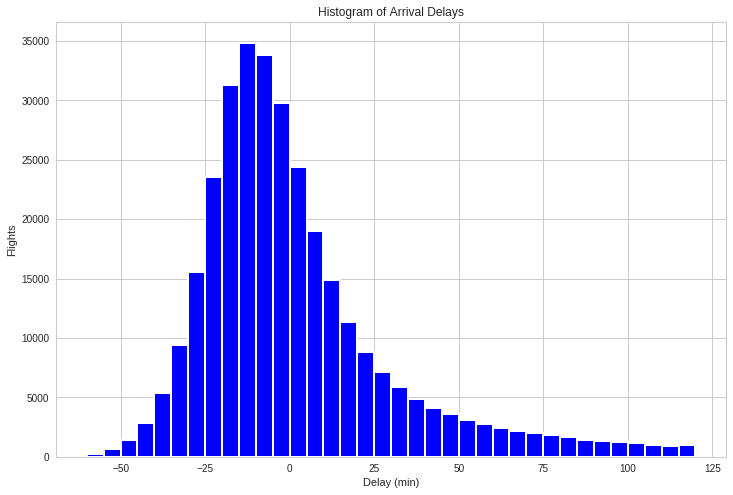

In [80]:
# Choose bin of 5-minute interval
plt.hist(flights.arr_delay,bins=int(180/5),color='blue',edgecolor='white',linewidth=2)
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

#### Plot w/ Seaborn

Text(0, 0.5, 'Flights')

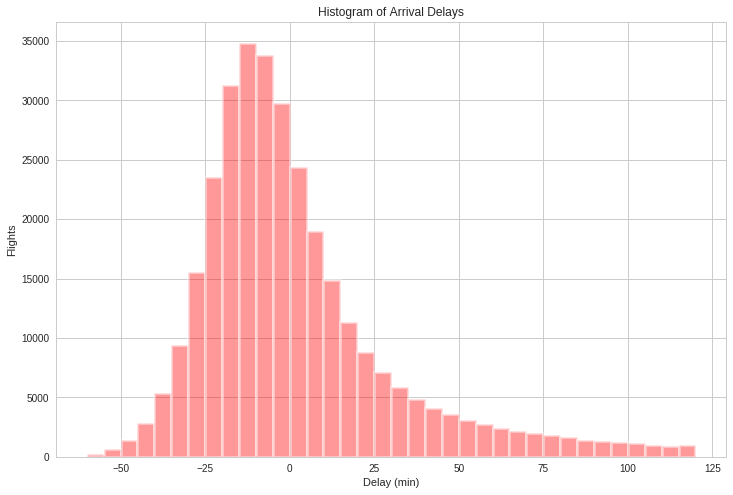

In [81]:
sns.distplot(flights.arr_delay, bins=int(180/5),kde=False,color='red',
             hist_kws={'edgecolor':'white', 'linewidth':3})
plt.title('Histogram of Arrival Delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

### Density Plots

*Notice:*  One potential issue with a density plot is that, because it calculates a distribution at each data point,it can **generate data that falls outside the bounds of the original data**. 

#### Plot regardless of Airlines

Text(0, 0.5, 'Flights')

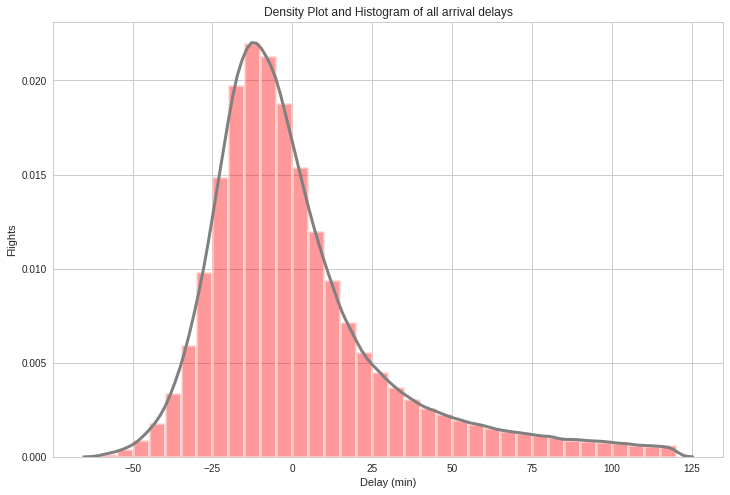

In [82]:
sns.distplot(flights.arr_delay, bins=int(180/5),kde=True,color='red',
             hist_kws={'edgecolor':'white','linewidth':3},
             kde_kws={'color':'grey', 'linewidth':3})
plt.title('Density Plot and Histogram of all arrival delays')
plt.xlabel('Delay (min)')
plt.ylabel('Flights')

#### Plot separately for each airline

Text(0, 0.5, 'Density')

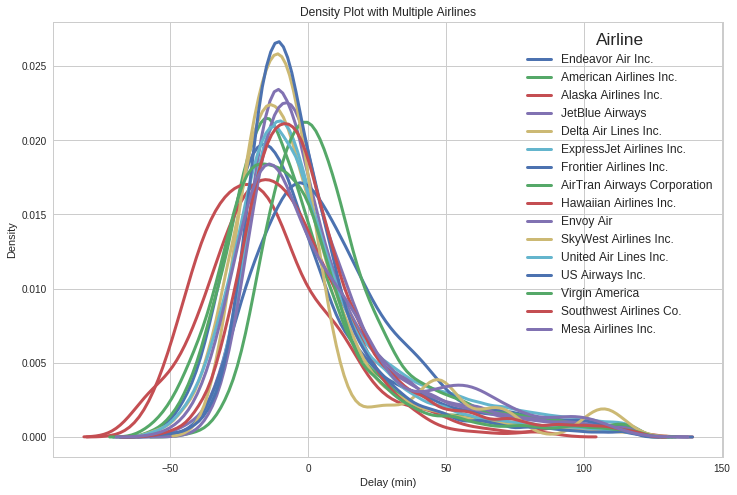

In [83]:
# Iterate through all the airlines
for airline in airlines.name:
    # Subset to the airline
    subset = flights[flights['name'] == airline]
    
    # Draw the density plot
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3}, label = airline)
    
# Plot formatting
plt.legend(prop={'size': 12}, title = 'Airline', title_fontsize='xx-large')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

All the airlines have nearly identical arrival delay distributions!

#### Shaded density plot of two airlines

Text(0, 0.5, 'Density')

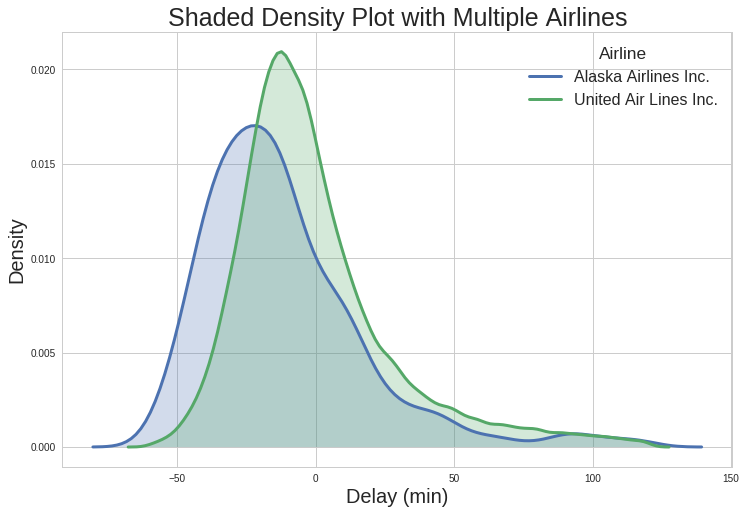

In [84]:
for airline in ['Alaska Airlines Inc.','United Air Lines Inc.']:
    subset = flights[flights['name'] == airline]    
    sns.distplot(subset['arr_delay'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3, 'shade': True}, label = airline)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Airline', title_fontsize='xx-large')
plt.title('Shaded Density Plot with Multiple Airlines', size=25)
plt.xlabel('Delay (min)', size=20)
plt.ylabel('Density', size=20)

### Rug Plots
This shows every single data point on the x-axis, allowing us to visualize all of the actual values.

Text(0, 0.5, 'Density')

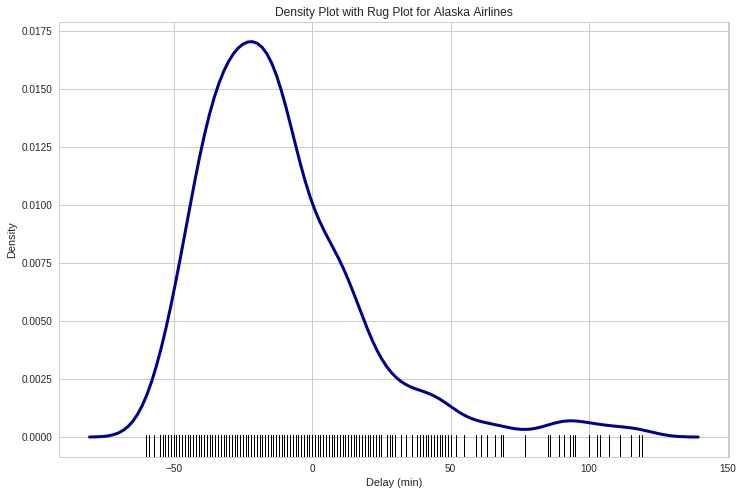

In [85]:
# Subset to Alaska Airlines
subset = flights[flights['name'] == 'Alaska Airlines Inc.']

# Density Plot with Rug Plot
sns.distplot(subset['arr_delay'], hist = False, kde = True, rug = True,
             color = 'darkblue', kde_kws={'linewidth': 3},
             rug_kws={'color': 'black'})

# Plot formatting
plt.title('Density Plot with Rug Plot for Alaska Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

## II. Homework Assignment

### Part 1. Which airline is most likely to get you to your destination on time?

#### Flight counts

In [86]:
flights.groupby('name')['arr_delay'].count().sort_values()

name
SkyWest Airlines Inc.             27
Hawaiian Airlines Inc.           332
Mesa Airlines Inc.               513
Frontier Airlines Inc.           639
Alaska Airlines Inc.             689
AirTran Airways Corporation     3021
Virgin America                  4920
Southwest Airlines Co.         11588
Endeavor Air Inc.              16578
US Airways Inc.                19547
Envoy Air                      24327
American Airlines Inc.         31197
Delta Air Lines Inc.           46468
ExpressJet Airlines Inc.       48641
JetBlue Airways                52267
United Air Lines Inc.          56359
Name: arr_delay, dtype: int64

Text(0, 0.5, 'Flights')

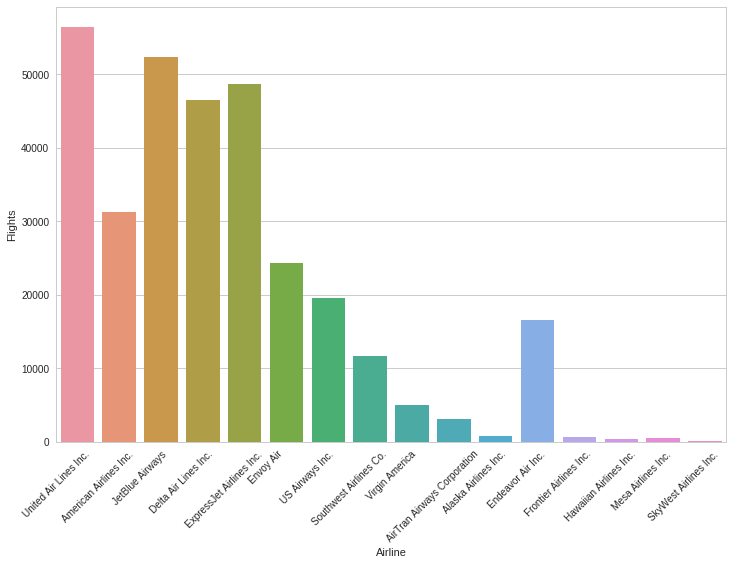

In [87]:
sns.countplot(x=flights.name)
plt.xticks(np.arange(16)-0.5, rotation=45)
plt.xlabel('Airline',)
plt.ylabel('Flights')

#### Mean Flight Delay Time

In [88]:
flights.groupby('name').mean().sort_values(by='arr_delay')

,arr_delay
name,
Alaska Airlines Inc.,-11.878084
Hawaiian Airlines Inc.,-11.608434
Virgin America,-5.178252
American Airlines Inc.,-3.985960
Delta Air Lines Inc.,-3.246191
United Air Lines Inc.,-0.805461
US Airways Inc.,-0.471070
Endeavor Air Inc.,-0.261913
SkyWest Airlines Inc.,1.814815


**Alaska Airlines Inc.** ranks first with the lowest mean delay time.

Text(0, 0.5, 'Flights')

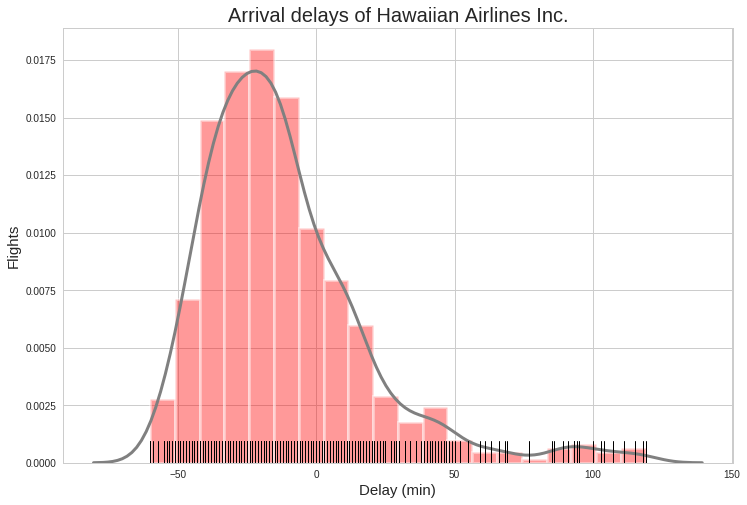

In [89]:
sns.distplot(flights[flights.name=='Alaska Airlines Inc.'].arr_delay,
             bins=20, color='red', hist=True, kde=True, rug=True,
             hist_kws={'edgecolor':'white', 'linewidth':3},
             kde_kws={'color':'grey', 'linewidth':3},
             rug_kws={'color':'black'})

plt.title('Arrival delays of Hawaiian Airlines Inc.', size=20)
plt.xlabel('Delay (min)', size=15)
plt.ylabel('Flights', size=15)

 #### Summary
 -  **Alaska Airlines Inc.** has the lowest mean delay time, but it doesn't offer large number of flights. 
 - Instead, **American Airlines Inc.** and **Delta Air Lines Inc.** offer more flights and also have a decent delay time (~ 3 mins early).

#### Conclusion
For all the flights departing NYC in 2013, **Alaska Airlines Inc.** is most likely to get you to your destination on time if it offers a flight to your destination. Otherwise, **American Airlines Inc.** and **Delta Air Lines Inc.** are also good choices.

### Part 2. Demonstrate the four aspects of the Central Limit Theorem
- Hint: take repeated random samples of a specific size and measure the mean and standard deviation of each one.
- Graph your results. Does it look like a normal distribution?
- How does sample size affect your results?

#### Population distribution

In [96]:
flights.describe()

,arr_delay
count,317113.000000
mean,1.297143
std,29.064401
min,-60.000000
25%,-17.000000
50%,-6.000000
75%,11.000000
max,120.000000


#### Take repeated samples with different sample sizes.

In [0]:
def sample_dist(size=10, repeat=100):
  mu = []
  for i in range(repeat):
    mu.append(flights.arr_delay.sample(size).mean())
    
  sns.distplot(mu, hist=True, kde=True, 
               kde_kws={'shade':True, 'linewidth':3}, label='sample')
  sns.distplot(flights.arr_delay, hist=True, kde=True, 
               kde_kws={'shade':True, 'linewidth':3}, label='population')

  plt.legend(prop={'size': 16}, title_fontsize='xx-large')
  plt.title(f'Shaded Density Plot of Sampling (size={size}) and Population Distributions', size=20)
  plt.xlabel('Delay (min)', size=15)
  plt.ylabel('Density', size=15)
  
  print('mean: %f' % (np.array(mu).mean()))
  print('std: %f' % (np.array(mu).std()))
  print('theoretical std: %f' % (flights.arr_delay.std()/np.sqrt(size)))

mean: 0.482000
std: 8.746238
theoretical std: 9.190971


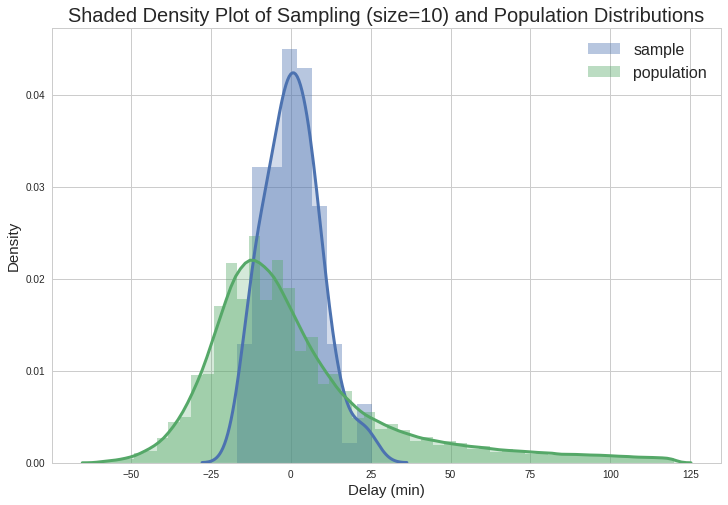

In [118]:
sample_dist()

mean: 1.383600
std: 3.536802
theoretical std: 4.110327


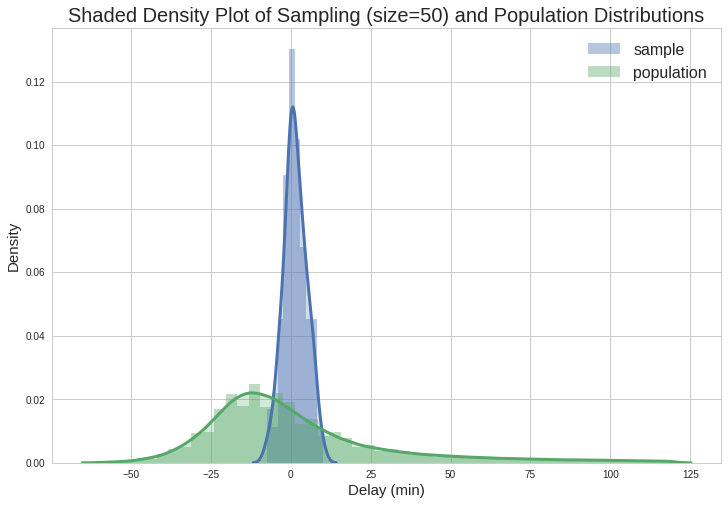

In [119]:
sample_dist(size=50)

mean: 1.203650
std: 1.907335
theoretical std: 2.055164


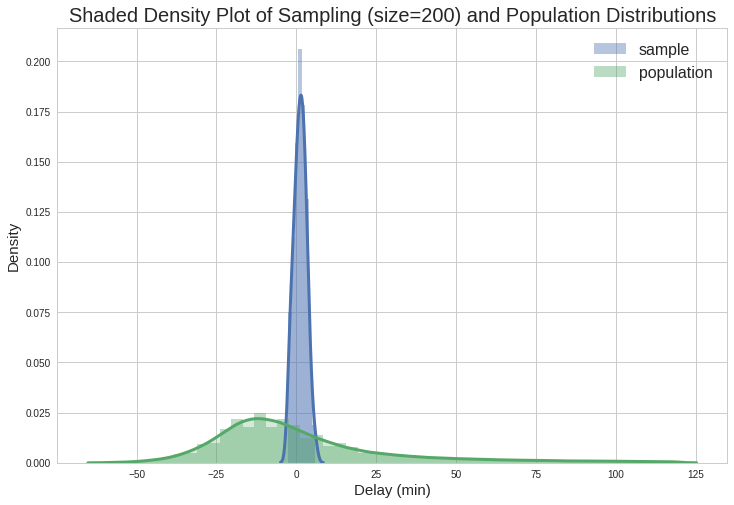

In [120]:
sample_dist(size=200)

#### Summary
According to the plots above under different configurantions, the sampling distribution has
 - similar mean value as the population distribution.
 - smaller std than the population distribution.
 - std which is very close to the theoretical std(=population std/sqrt(sample size)). 


### Central Limit Theorem Approved!
 - The sampling distribution of the mean will be less spread than the values in the population from which the sample is drawn.
 - The sampling distribution will be well-modeled by a normal distribution (and it will get closer with larger sample sizes).
 - The spread of the sampling distribution is related to the spread of the population values.
 - Bigger samples leads to a smaller spread in the sampling distribution.

## Credits

- [Data Lit](https://www.theschool.ai/courses/data-lit/lessons/homework-assignment-analyzing-distributions/) by School of AI, Siraj, Colin and all the other folks

- [Tutorial](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0) by Will Koehrsen